# **Marketing Campaign Prediction in Banking**

By Aqilah, Genta, and Fadly

Data Source : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Attribute Information:

Input variables:<br><br>
**Bank client data**: <br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-empl<br>oyed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br><br>
**Related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br><br>
**Other attributes:**<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br><br>
**Social and economic context attributes**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import pandas as pd
data = pd.read_csv('bank_marketing.csv')

In [ ]:
!pip install pycaret

# **Data Preprocessing**

Field yang bersifat kategorikal kita sesuaikan sesuai dengan format datanya.

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
data.groupby('y')['age'].count()

y
no     36548
yes     4640
Name: age, dtype: int64

In [ ]:
data['education'] = data['education'].astype('category')
data['education'] = data['education'].cat.reorder_categories(['unknown','illiterate','basic.4y','basic.6y','basic.9y',
                                                             'high.school','professional.course','university.degree'])

In [ ]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['y'] = data['y'].astype('category')
data = data[data['y']!= '-1']
data['y'] = data['y'].cat.reorder_categories(['no','yes']) 
data['y'] = data['y'].cat.codes

In [ ]:
data_model = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(data.index)
data_model.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_model.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions: (0, 21)


#**Modelling**

Melakukan proses percobaan terhadap model-model klasifikasi. <br>
Seed didefinisikan di config supaya hasilnya dapat diulang (reproducible). <br>
Data awal yang digunakan imbalance, hanya 11% yang merupakan nasabah yes. <br>
Untuk menangani masalah tersebut, kita gunakan SMOTE.


In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf101 = setup(data = data_model, target = 'y', fix_imbalance = True,session_id=345)

,Description,Value
0,session_id,345
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(37069, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
set_config('seed', 45)

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9145,0.9485,0.5784,0.6377,0.6062,0.5584,0.5594,1.550
rf,Random Forest Classifier,0.9095,0.9390,0.4877,0.6344,0.5508,0.5015,0.5072,6.467
gbc,Gradient Boosting Classifier,0.9091,0.9427,0.6041,0.6010,0.6021,0.5509,0.5511,14.488
ada,Ada Boost Classifier,0.9059,0.9302,0.5188,0.6010,0.5565,0.5042,0.5061,3.304
et,Extra Trees Classifier,0.9018,0.9203,0.4119,0.6016,0.4883,0.4362,0.4461,6.549
dummy,Dummy Classifier,0.8861,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.185
dt,Decision Tree Classifier,0.8855,0.7323,0.5340,0.4977,0.5151,0.4503,0.4507,0.727
nb,Naive Bayes,0.8725,0.8135,0.4711,0.4439,0.4569,0.3847,0.3851,0.211
ridge,Ridge Classifier,0.8642,0.0000,0.8477,0.4495,0.5873,0.5151,0.5524,0.221
lda,Linear Discriminant Analysis,0.8642,0.9310,0.8477,0.4494,0.5872,0.5150,0.5523,0.729


In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9156,0.9444,0.5709,0.6475,0.6068,0.5598,0.5612
1,0.9148,0.9470,0.5372,0.6543,0.5900,0.5430,0.5463
2,0.9125,0.9465,0.5845,0.6245,0.6038,0.5547,0.5551
3,0.9125,0.9468,0.5709,0.6283,0.5982,0.5493,0.5501
4,0.9133,0.9438,0.5811,0.6300,0.6046,0.5560,0.5565
5,0.9195,0.9529,0.6441,0.6463,0.6452,0.5997,0.5997
6,0.9094,0.9439,0.5593,0.6111,0.5841,0.5334,0.5340
7,0.9133,0.9524,0.5898,0.6259,0.6073,0.5586,0.5590
8,0.9210,0.9590,0.5797,0.6786,0.6252,0.5814,0.5836
9,0.9129,0.9480,0.5661,0.6302,0.5964,0.5478,0.5487


In [ ]:
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9125,0.9439,0.5541,0.6332,0.5910,0.5423,0.5438
1,0.9152,0.9481,0.5270,0.6610,0.5865,0.5399,0.5442
2,0.9098,0.9445,0.5338,0.6220,0.5745,0.5244,0.5264
3,0.9141,0.9468,0.5608,0.6409,0.5982,0.5503,0.5519
4,0.9171,0.9461,0.5878,0.6517,0.6181,0.5718,0.5727
5,0.9179,0.9520,0.6305,0.6414,0.6359,0.5896,0.5897
6,0.9118,0.9442,0.5695,0.6222,0.5947,0.5453,0.5460
7,0.9094,0.9509,0.5661,0.6095,0.5870,0.5362,0.5367
8,0.9237,0.9583,0.5966,0.6902,0.6400,0.5976,0.5995
9,0.9163,0.9465,0.5627,0.6535,0.6047,0.5583,0.5602


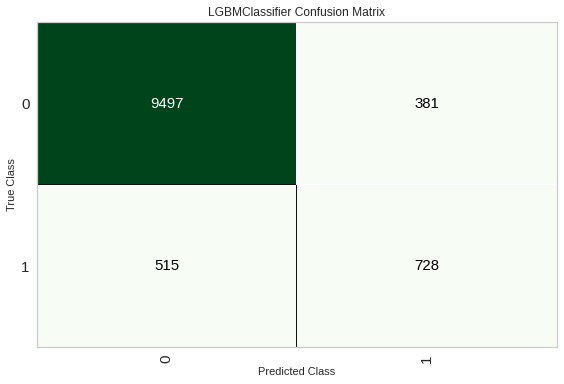

In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

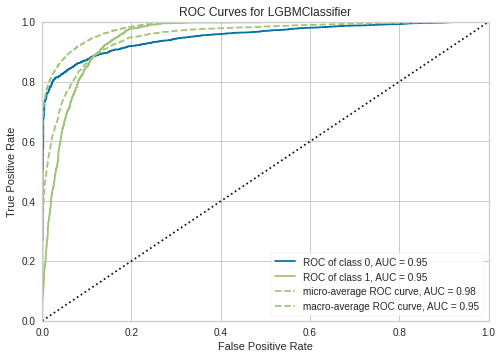

In [ ]:
plot_model(tuned_lgbm, plot = 'auc')

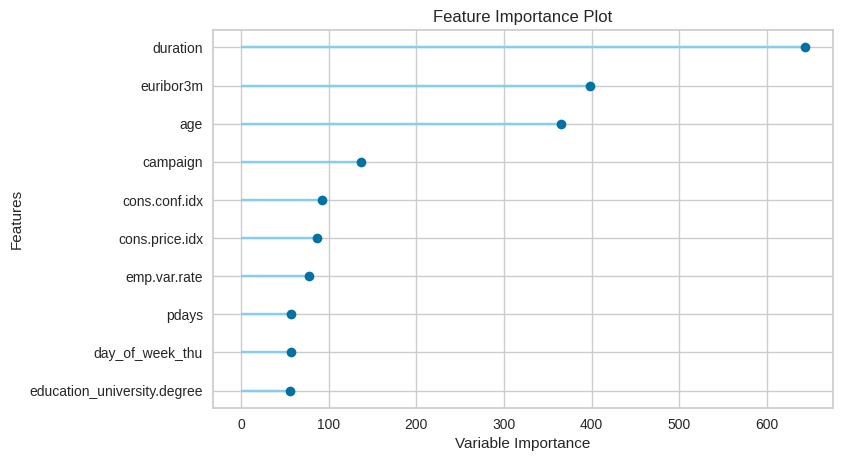

In [ ]:
plot_model(tuned_lgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Conclusion**


1.   Light Gradient Boosting Machine merupakan model terbaik dari segi ROC-AUC (95% pasca tuning) dan F1 Score (60%). 
2.   Kondisi data yang sangat imbalance, sehingga accuracy bukan parameter yang dinilai
3.   Jika fokus prediksi adalah memaksimalkan kemampuan model dalam membedakan class 0 dan class 1, maka LGBM merupakan metode terbaik karena score ROC-AUC nya 95%
4.   Jika fokus prediksi adalah memaksimalkan jumlah potential takers tapi juga meminimalisir cost campaign, maka belum ada model yang baik dikarenakan score precision untuk class 1 masih rendah. Saat ini score precision class 1 terbaik juga ada pada LGBM dengan score 66%
5.   Jika fokus prediksi adalah memaksimalkan jumlah potential takers dengan menoleransi banyaknya campaign terhadap non potential takers, maka belum ada model yang baik dikarenakan score recall untuk class 1 masih rendah. Saat ini score recall class 1 terbaik juga ada pada LGBM dengan score 55%. Cara lain adalah dengan mengubah treshold probability classification pada model yang sama untuk menambah score recallnya

